In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [112]:
#read data with pandas library
data = pd.read_excel (r'dataset.xlsx')
data.dropna(inplace=True)
data.drop(["Name"],1,inplace=True)

In [113]:
data.head(3) #First 3 samples of the our dataset:

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


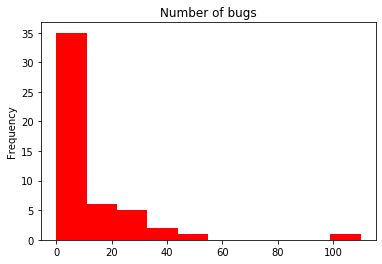

In [114]:
#show the distribution of 3 metrics
def plotHist(columnIndex,columnName,colorName):
    data[columnIndex].plot(kind="hist",color=colorName)
    plt.title(columnName)

plotHist("NOB","Number of bugs","r")
 
    
    #write your code here


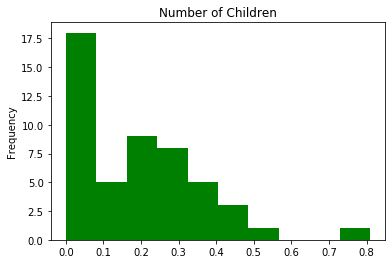

In [115]:
plotHist("NOC","Number of Children","g")

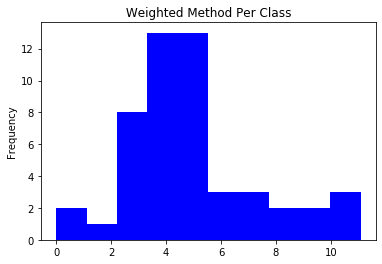

In [116]:
plotHist("WMC"," Weighted Method Per Class ","b")

In [117]:
min_max_scaler = MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        data[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(data[col])),columns=[col])
    return data
data=scaleColumns(data,data.iloc[:,:])
data

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


# Part1 (Statistical Correlation Analysis)

In [118]:
#Show the correlation matrix of all metrics
data.corr(method="spearman")

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [119]:
#P values of Spearman Correlation Table
a=scipy.stats.spearmanr(data)[1]
np.set_printoptions(suppress=True)
p=np.around(a,4)
p_values = pd.DataFrame(data=p, index=["NOB","V","SH","CS","CDR","TD","NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"], columns=["NOB","V","SH","CS","CDR","TD","NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"])
p_values
#write your code here

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


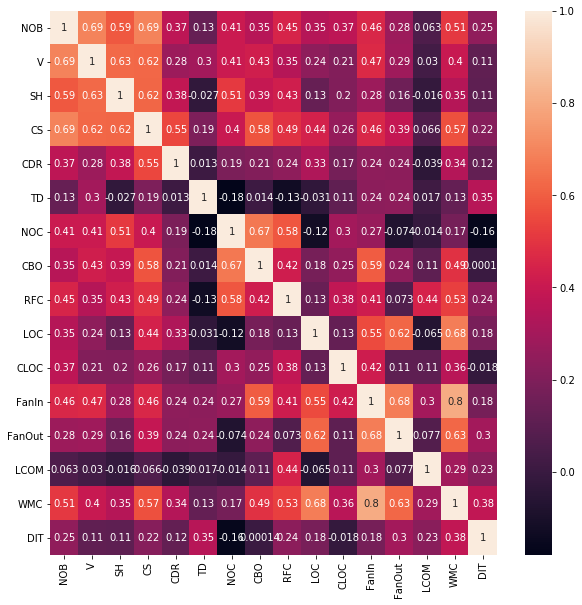

In [120]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.figure(figsize=(10,10))
sns.heatmap(data.iloc[:,:].corr(method="spearman"), annot=True)


In [121]:
#Correlation between External Metrics & TD
data2=data.drop(columns=["NOC","CBO","RFC","LOC","CLOC","FanIn","FanOut","LCOM","WMC","DIT"])
data2.corr(method="spearman")


,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [122]:
#Correlation between Internal Metrics & TD
data2=data.drop(columns=["NOB","V","SH","CS"])
data2.corr(method="spearman")

,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid

def plotGraph(y_test,y_predict,regressorName):
  #Plot the Scatter Graph to see results better
    print("R-Squared Value:      ",r2_score(Y_test,y_predict))
    print("Root Mean Squared Error:    ",np.sqrt(mean_squared_error(Y_test, y_predict)))
    plt.scatter(y_test,y_test,c="y",label="Prediction Values")
    plt.scatter(y_test,y_predict,c="r",label="Original Values")
    plt.legend()
    plt.title(regressorName)
    plt.show()
#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(X_train,y_train,X_test,y_test):
  # Create the regressor: reg_all
    global y_predict
    lr = LinearRegression()
    model = lr.fit(X_train, y_train)
    y_predict=model.predict(X_test)
    return y_predict
#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,y_train,X_test,y_test):
    global y_predict
    rbfsvr = SVR(kernel='rbf')
    model=rbfsvr.fit(X_train, y_train.ravel())
    y_predict = model.predict(X_test)
    return y_predict
def svrRegressionlinear(X_train,y_train,X_test,y_test):
    global y_predict
    lsvr = SVR(kernel='linear')
    model=lsvr.fit(X_train, y_train.ravel())
    y_predict = model.predict(X_test)
    return y_predict
def decisionTreeRegression(X_train,y_train,X_test,y_test):
    global y_predict
    dct=DecisionTreeRegressor(random_state=53)
    dct.fit(X_train,y_train)
    y_predict=dct.predict(X_test)
    return y_predict

def randomDecTreeRegression(X_train,y_train,X_test,y_test):
    global y_predict
    frst=RandomForestRegressor(random_state = 53)
    frst.fit(X_train,y_train.ravel())
    y_predict=frst.predict(X_test)
    return y_predict
#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,y_train,X_test,y_test):
    global y_predict
    mr=MLPRegressor()
    mr.fit(X_train,y_train.ravel())
    y_predict=mr.predict(X_test)
    return y_predict


In this step (step 3), we will try to estimate Technical Debt using internal metrics.

## GRAPHS OF TD

In [124]:
#split data into train and test data
X =  data.iloc[:, 6:].values
Y = data.iloc[:, 5].values.reshape((-1,1)) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 53)

R-Squared Value:       -0.17296753046920732
Root Mean Squared Error:     0.2650640776760429


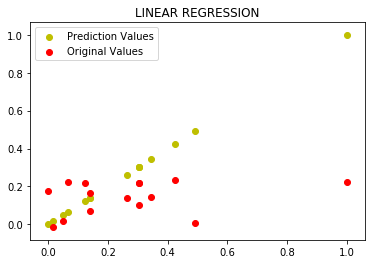

In [125]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
y_predict=linearRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"LINEAR REGRESSION")



R-Squared Value:       -0.07658669531666251
Root Mean Squared Error:     0.25394074173641473


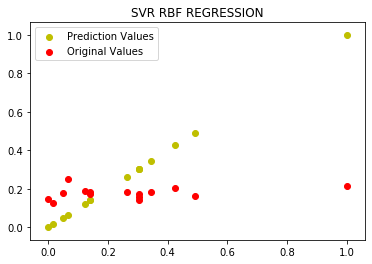

In [126]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
y_predict=svrRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR RBF REGRESSION")


R-Squared Value:       -0.3526354995047598
Root Mean Squared Error:     0.2846415332813681


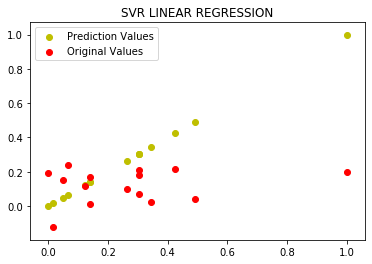

In [127]:
svrRegressionlinear(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR LINEAR REGRESSION")

R-Squared Value:       -0.5204592360688753
Root Mean Squared Error:     0.30178334647732696


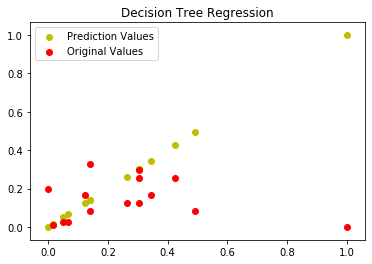

In [128]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error ),
y_predict=decisionTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Decision Tree Regression")

R-Squared Value:       -0.1744307107889569
Root Mean Squared Error:     0.26522934894686007


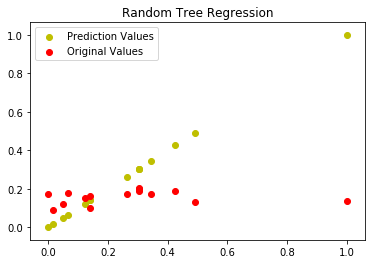

In [129]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
y_predict=randomDecTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Random Tree Regression")

R-Squared Value:       -0.15258337479989859
Root Mean Squared Error:     0.2627508048575994


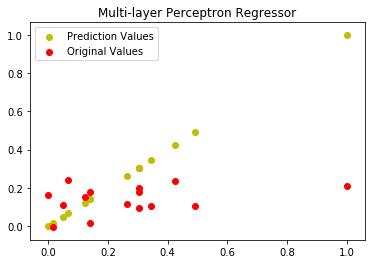

In [130]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
y_predict=mlpRegressor(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Multi-layer Perceptron Regressor")


In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [131]:
#split data into train and test data
X =  data.iloc[:, :4].values
Y = data.iloc[:, 5].values.reshape((-1,1)) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 53)

R-Squared Value:       -0.4331628534217624
Root Mean Squared Error:     0.2929919249634493


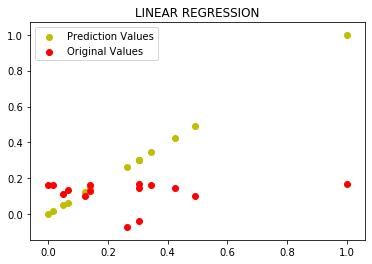

In [132]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
y_predict=linearRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"LINEAR REGRESSION")


R-Squared Value:       -0.45281551449179935
Root Mean Squared Error:     0.2949939533353097


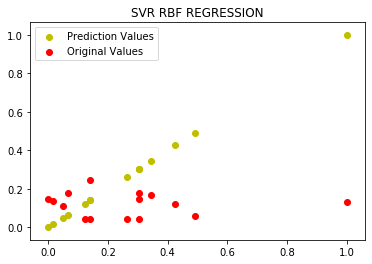

In [133]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
y_predict=svrRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR RBF REGRESSION")

R-Squared Value:       -0.3170558678590276
Root Mean Squared Error:     0.28087299055485854


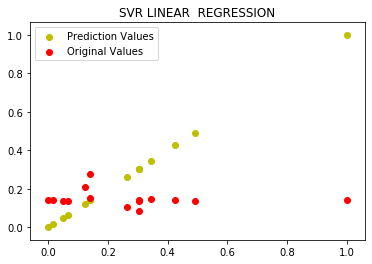

In [134]:
svrRegressionlinear(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR LINEAR  REGRESSION")

R-Squared Value:       -0.7371656181142008
Root Mean Squared Error:     0.32257335573307827


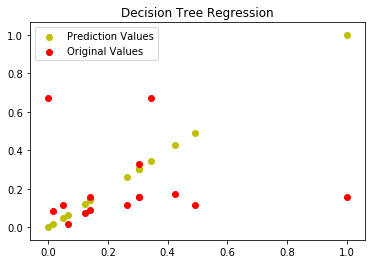

In [135]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
y_predict=decisionTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Decision Tree Regression")

R-Squared Value:       -0.11927607069503599
Root Mean Squared Error:     0.25892649296700004


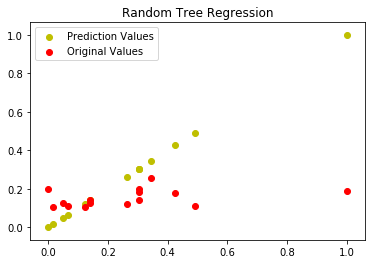

In [136]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
y_predict=randomDecTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Random Tree Regression")

R-Squared Value:       -0.3263180163976567
Root Mean Squared Error:     0.2818588749495399


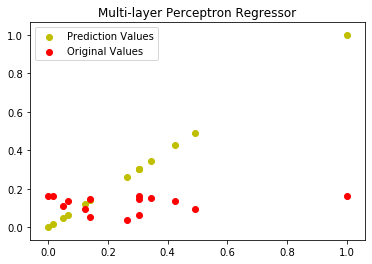

In [137]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
y_predict=mlpRegressor(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Multi-layer Perceptron Regressor")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [138]:
#split data into train and test data
X =  data.drop(columns=['TD', 'CDR']).values
Y = data.iloc[:, 5].values.reshape((-1,1)) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 53)


R-Squared Value:       -0.003633279100097697
Root Mean Squared Error:     0.2451858519572479


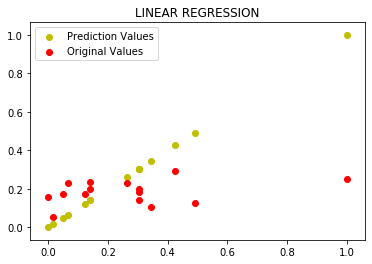

In [139]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
y_predict=linearRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"LINEAR REGRESSION")


R-Squared Value:       -0.09720921648004222
Root Mean Squared Error:     0.2563613813817413


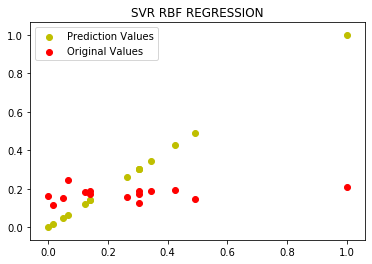

In [140]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
y_predict=svrRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR RBF REGRESSION")

R-Squared Value:       -0.36281172246930304
Root Mean Squared Error:     0.2857102425477753


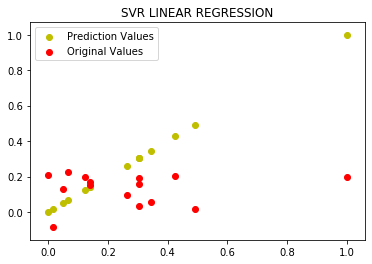

In [141]:
svrRegressionlinear(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR LINEAR REGRESSION")

R-Squared Value:       -0.2556706581453083
Root Mean Squared Error:     0.2742494419820825


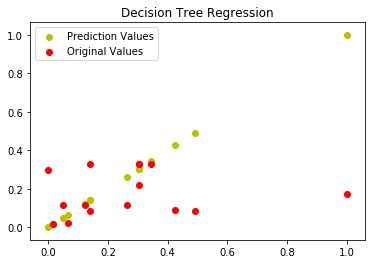

In [142]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
y_predict=decisionTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Decision Tree Regression")

R-Squared Value:       0.048007988773343446
Root Mean Squared Error:     0.23879461646456565


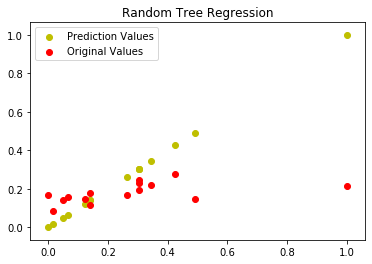

In [143]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
y_predict=randomDecTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Random Tree Regression")

R-Squared Value:       -0.9131156834793384
Root Mean Squared Error:     0.3385154505581854


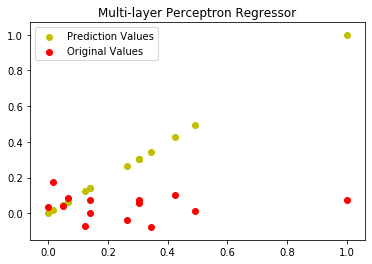

In [144]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
y_predict=mlpRegressor(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Multi-layer Perceptron Regressor")

## GRAPHS OF CDR

In [145]:
X =  data.iloc[:, 6:].values
Y = data.iloc[:, 4].values.reshape((-1,1)) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 53)

R-Squared Value:       -0.25353936900603125
Root Mean Squared Error:     0.2822820349754405


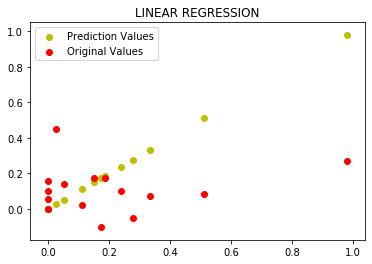

In [146]:
y_predict=linearRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"LINEAR REGRESSION")

R-Squared Value:       -0.16455641994479597
Root Mean Squared Error:     0.2720786834980814


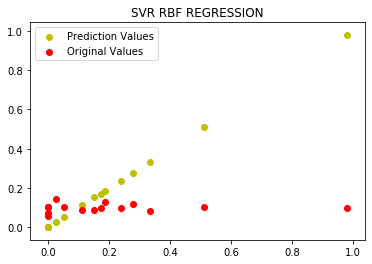

In [147]:
y_predict=svrRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR RBF REGRESSION")

R-Squared Value:       -0.12212300389682662
Root Mean Squared Error:     0.2670757664434763


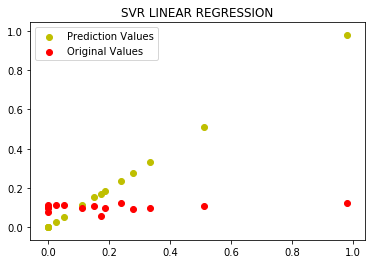

In [148]:
svrRegressionlinear(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR LINEAR REGRESSION")

R-Squared Value:       -0.12150757783825572
Root Mean Squared Error:     0.26700251782083956


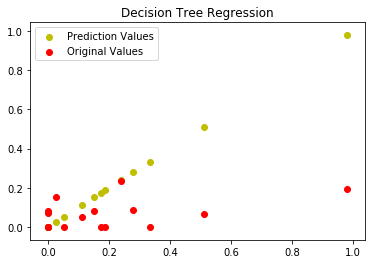

In [149]:
y_predict=decisionTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Decision Tree Regression")

R-Squared Value:       -0.03553425364802698
Root Mean Squared Error:     0.2565644532568086


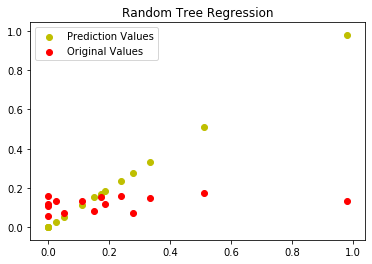

In [150]:
y_predict=randomDecTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Random Tree Regression")

R-Squared Value:       -0.2353603536771789
Root Mean Squared Error:     0.2802277116129498


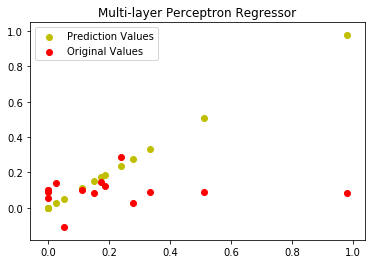

In [151]:
y_predict=mlpRegressor(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Multi-layer Perceptron Regressor")

In [152]:
X =  data.iloc[:, 0:4].values
Y = data.iloc[:, 4].values.reshape((-1,1)) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 53)

R-Squared Value:       -0.29877407933861844
Root Mean Squared Error:     0.2873300555429503


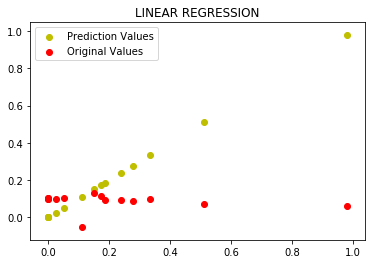

In [153]:
y_predict=linearRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"LINEAR REGRESSION")

R-Squared Value:       -0.05742000726843233
Root Mean Squared Error:     0.2592614897703499


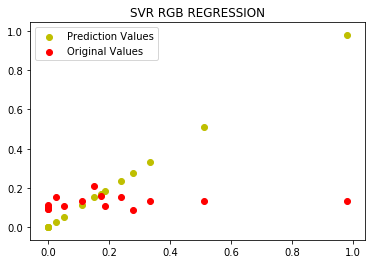

In [154]:
y_predict=svrRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR RGB REGRESSION")

R-Squared Value:       -0.10105796501066222
Root Mean Squared Error:     0.2645570517029422


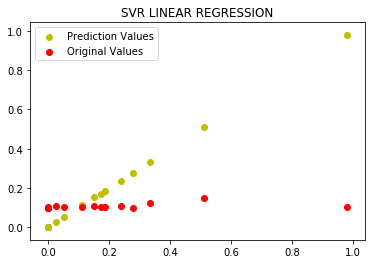

In [155]:
svrRegressionlinear(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR LINEAR REGRESSION")

R-Squared Value:       -0.49827719657436775
Root Mean Squared Error:     0.3086102422213462


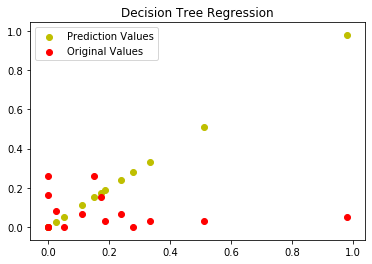

In [156]:
y_predict=decisionTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Decision Tree Regression")

R-Squared Value:       -0.2632742903155614
Root Mean Squared Error:     0.2833760089217237


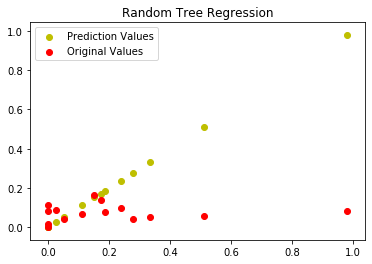

In [157]:
y_predict=randomDecTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Random Tree Regression")

R-Squared Value:       -0.38947131194878204
Root Mean Squared Error:     0.29719331945707156


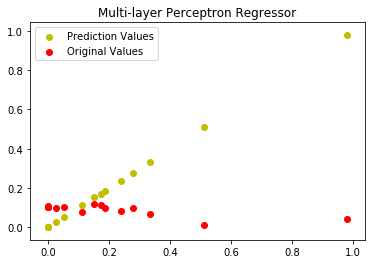

In [158]:
y_predict=mlpRegressor(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Multi-layer Perceptron Regressor")

In [159]:
X =  data.drop(columns=['TD', 'CDR']).values
Y = data.iloc[:, 4].values.reshape((-1,1)) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 53)

R-Squared Value:       -2.009141591295796
Root Mean Squared Error:     0.43735647669844613


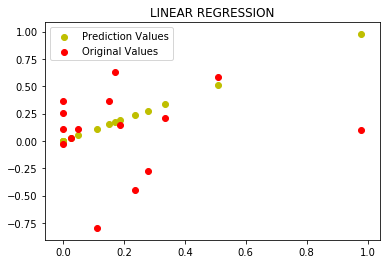

In [160]:
y_predict=linearRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"LINEAR REGRESSION")

R-Squared Value:       -0.23945919966775864
Root Mean Squared Error:     0.2806922153718834


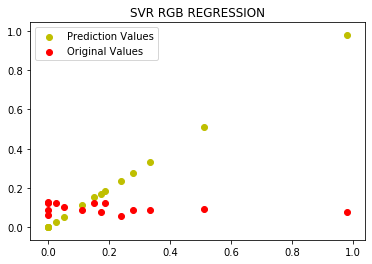

In [161]:
y_predict=svrRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR RGB REGRESSION")

R-Squared Value:       -0.1605709781449498
Root Mean Squared Error:     0.2716127193456499


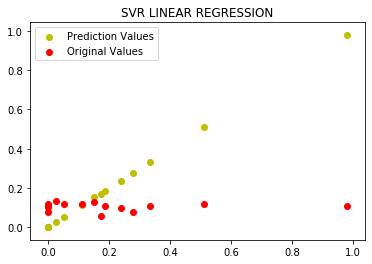

In [162]:
y_predict=svrRegressionlinear(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"SVR LINEAR REGRESSION")

R-Squared Value:       -0.05417378556625985
Root Mean Squared Error:     0.25886322456148736


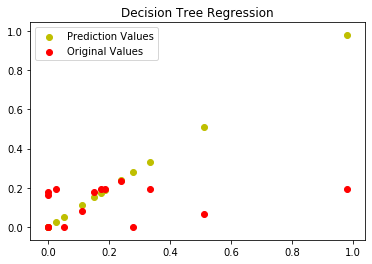

In [163]:
y_predict=decisionTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Decision Tree Regression")

R-Squared Value:       -0.031284868043244485
Root Mean Squared Error:     0.2560374972139704


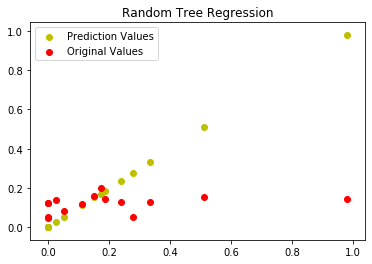

In [164]:
y_predict=randomDecTreeRegression(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Random Tree Regression")

R-Squared Value:       -0.8452029730400803
Root Mean Squared Error:     0.342480874218282


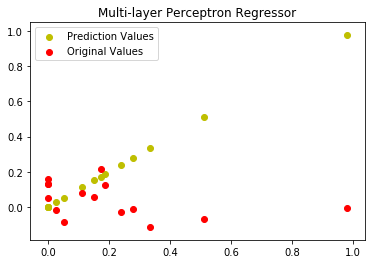

In [165]:
y_predict=mlpRegressor(X_train,Y_train,X_test,Y_test)
plotGraph(Y_test,y_predict,"Multi-layer Perceptron Regressor")